In [1]:
from sklearn.decomposition import PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


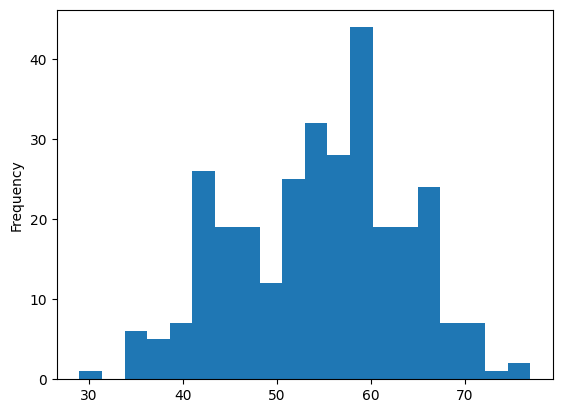

In [8]:
df["age"].plot.hist(bins=20)
plt.show()

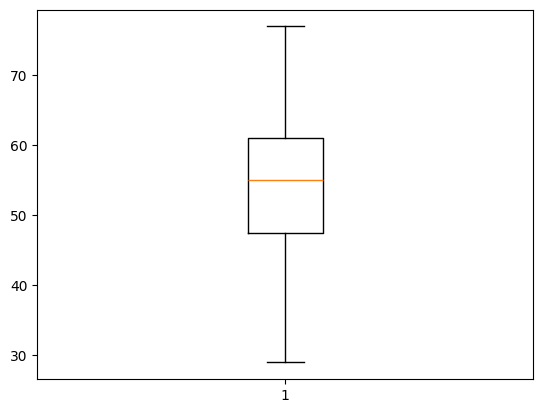

In [9]:
plt.boxplot(df["age"])
plt.show()

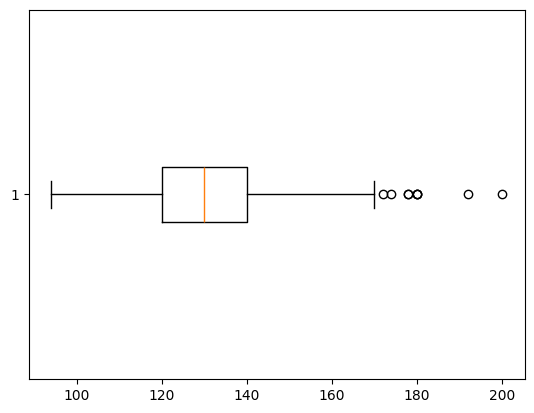

In [10]:
plt.boxplot(df["trtbps"], vert=False)
plt.show()

In [11]:
df["trtbps"].quantile([0.9, 0.91, 0.93, 0.95, 0.97])

0.90    152.00
0.91    154.82
0.93    160.00
0.95    160.00
0.97    170.00
Name: trtbps, dtype: float64

In [12]:
df["trtbps"][df["trtbps"] > df["trtbps"].quantile(0.98)]

101    178
110    180
203    180
223    200
248    192
260    178
266    180
Name: trtbps, dtype: int64

In [13]:
dummy = df["trtbps"]

In [14]:
dummy

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trtbps, Length: 303, dtype: int64

In [15]:
ls = list(map(lambda x: int(dummy.mean()) if x > 170 else x, dummy))
# lambda input: output
# map(function, iterable)

In [16]:
ls

[145,
 130,
 130,
 120,
 120,
 140,
 140,
 120,
 131,
 150,
 140,
 130,
 130,
 110,
 150,
 120,
 120,
 150,
 150,
 140,
 135,
 130,
 140,
 150,
 140,
 160,
 150,
 110,
 140,
 130,
 105,
 120,
 130,
 125,
 125,
 142,
 135,
 150,
 155,
 160,
 140,
 130,
 104,
 130,
 140,
 120,
 140,
 138,
 128,
 138,
 130,
 120,
 130,
 108,
 135,
 134,
 122,
 115,
 118,
 128,
 110,
 108,
 118,
 135,
 140,
 138,
 100,
 130,
 120,
 124,
 120,
 94,
 130,
 140,
 122,
 135,
 125,
 140,
 128,
 105,
 112,
 128,
 102,
 152,
 102,
 115,
 118,
 101,
 110,
 100,
 124,
 132,
 138,
 132,
 112,
 142,
 140,
 108,
 130,
 130,
 148,
 131,
 140,
 120,
 129,
 120,
 160,
 138,
 120,
 110,
 131,
 150,
 140,
 110,
 130,
 120,
 130,
 120,
 105,
 138,
 130,
 138,
 112,
 108,
 94,
 118,
 112,
 152,
 136,
 120,
 160,
 134,
 120,
 110,
 126,
 130,
 120,
 128,
 110,
 128,
 120,
 115,
 120,
 106,
 140,
 156,
 118,
 150,
 120,
 130,
 160,
 112,
 170,
 146,
 138,
 130,
 130,
 122,
 125,
 130,
 120,
 132,
 120,
 138,
 138,
 160,
 120,


In [17]:
max(ls)

170

In [18]:
len(ls)

303

In [19]:
df["trtbps"] = ls

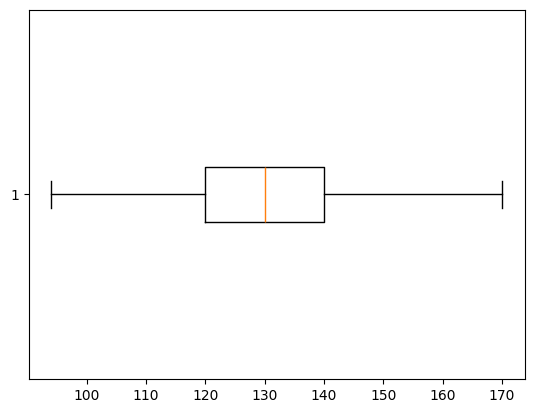

In [20]:
plt.boxplot(df["trtbps"], vert=False)
plt.show()

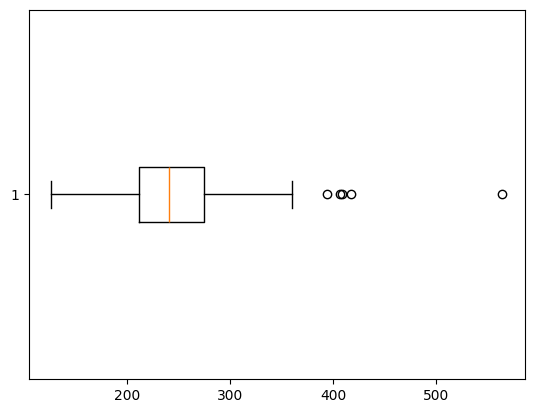

In [21]:
plt.boxplot(df["chol"], vert=False)
plt.show()

In [22]:
df["chol"][df["chol"] > df["chol"].quantile(0.97)]

4      354
28     417
39     360
85     564
96     394
161    342
180    353
215    341
220    407
246    409
Name: chol, dtype: int64

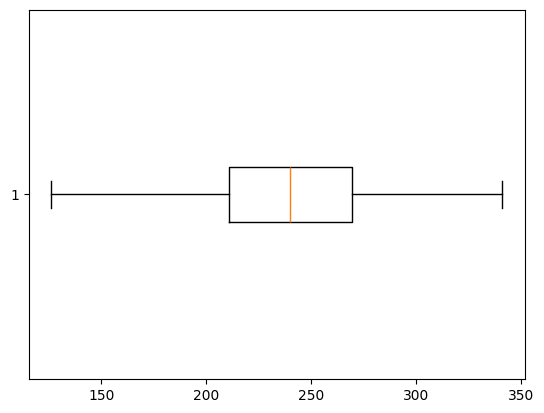

In [23]:
dummy = df["chol"]
ls = list(map(lambda x: int(dummy.mean()) if x > 341 else x, dummy))
df["chol"] = ls
plt.boxplot(df["chol"], vert=False)
plt.show()

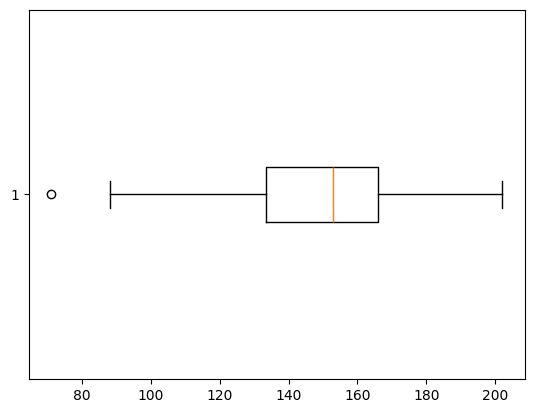

In [24]:
plt.boxplot(df["thalachh"], vert=False)
plt.show()

In [25]:
df["thalachh"][df["thalachh"] < df["thalachh"].quantile(0.01)]

243    88
262    95
272    71
297    90
Name: thalachh, dtype: int64

In [26]:
df = df[df["thalachh"]!=71]

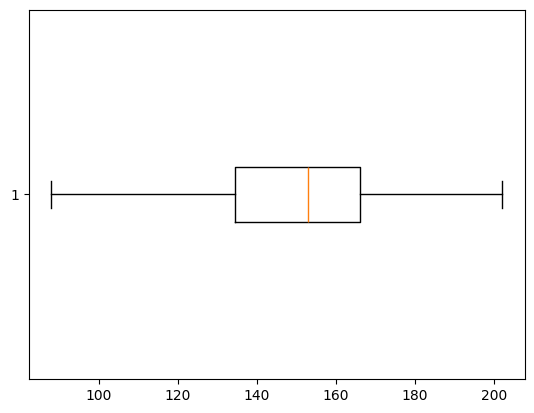

In [27]:
plt.boxplot(df["thalachh"], vert=False)
plt.show()

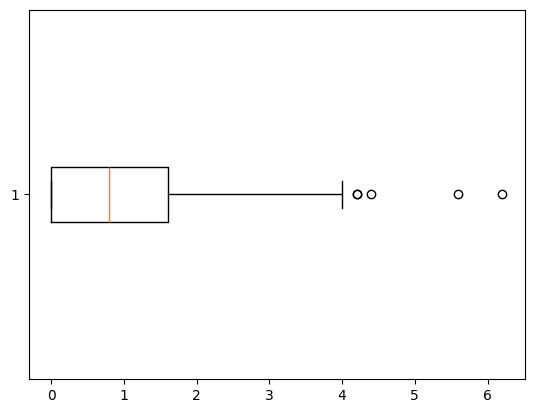

In [28]:
plt.boxplot(df["oldpeak"], vert=False)
plt.show()

In [29]:
df["oldpeak"][df["oldpeak"] > df["oldpeak"].quantile(0.95)]

1      3.5
101    4.2
167    3.6
196    3.6
204    6.2
211    3.6
220    4.0
221    5.6
223    4.0
250    4.2
259    3.8
279    3.6
291    4.4
295    4.0
Name: oldpeak, dtype: float64

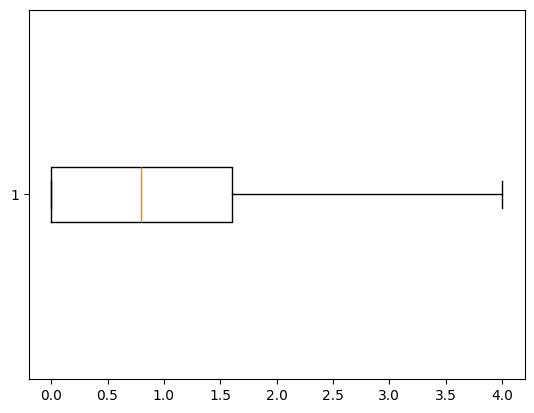

In [30]:
dummy = df["oldpeak"]
ls = list(map(lambda x: dummy.mean() if x > 4.0 else x, dummy))
df["oldpeak"] = ls
plt.boxplot(df["oldpeak"], vert=False)
plt.show()

<Axes: >

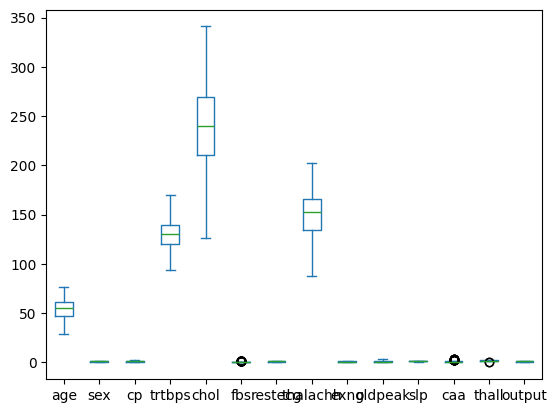

In [31]:
df.plot.box()

In [32]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,246,0,1,163,1,0.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [34]:
df.reset_index(drop=True, inplace=True)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
std = StandardScaler()

In [37]:
new_df = df.copy()

In [38]:
new_df[["age","trtbps", "chol", "thalachh", "oldpeak"]] = std.fit_transform(new_df[["age","trtbps", "chol", "thalachh", "oldpeak"]])

In [39]:
new_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.958315,1,3,0.981784,-0.202960,1,0,0.004129,0,1.272507,0,0,1,1
1,-1.913705,1,2,-0.010293,0.193387,0,1,1.652081,0,2.425395,0,0,2,1
2,-1.471855,0,1,-0.010293,-0.879083,0,0,0.983993,0,0.407841,2,0,2,1
3,0.185079,1,1,-0.671678,-0.133017,0,1,1.251228,0,-0.168602,2,0,2,1
4,0.295542,0,0,-0.671678,0.100129,0,1,0.583140,1,-0.360750,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.295542,0,0,0.651092,-0.016444,0,1,-1.198430,1,-0.745046,1,0,3,0
298,-1.030006,1,3,-1.333062,0.519792,0,1,-0.797577,0,0.215693,1,0,3,0
299,1.510627,1,0,0.915645,-1.135543,1,1,-0.396724,0,2.329321,1,2,3,0
300,0.295542,1,0,-0.010293,-2.581047,0,1,-1.554744,1,0.215693,1,1,3,0


In [40]:
pca = PCA(n_components=3)

In [50]:
X = pca.fit_transform(new_df.drop("output", axis=1))

In [51]:
y = new_df["output"]

In [42]:
pca.explained_variance_

array([2.23633244, 1.23280811, 1.05738794])

In [43]:
pca.get_covariance()

array([[ 8.75470932e-01, -2.07998649e-03, -8.58652154e-02,
         3.55802519e-01,  2.18633799e-01,  3.55729259e-02,
        -6.80651558e-02, -3.25861626e-01,  7.11039235e-02,
         2.91588777e-01, -1.31048642e-01,  3.24040490e-01,
         6.30930321e-02],
       [-2.07998649e-03,  4.25059765e-01, -2.75428164e-02,
        -1.60958027e-02, -2.77977162e-02, -1.54745291e-03,
         1.44278336e-03, -3.18198676e-02,  1.14759334e-02,
         3.33361972e-02, -1.70068721e-02,  5.98886893e-03,
         6.52368656e-03],
       [-8.58652154e-02, -2.75428164e-02,  9.57841333e-01,
         1.96622467e-01, -1.49097419e-01,  1.67438105e-02,
         1.35207780e-02,  3.37225514e-01, -1.48451730e-01,
        -1.79648130e-01,  9.72892440e-02, -2.32262164e-01,
        -1.01077958e-01],
       [ 3.55802519e-01, -1.60958027e-02,  1.96622467e-01,
         8.31662615e-01,  1.19623916e-01,  3.96745056e-02,
        -5.29659099e-02, -1.13306315e-01, -1.31937309e-02,
         1.61985773e-01, -6.43153205e

In [46]:
var = df.iloc[34, :-1]
var

age          51.0
sex           1.0
cp            3.0
trtbps      125.0
chol        213.0
fbs           0.0
restecg       0.0
thalachh    125.0
exng          1.0
oldpeak       1.4
slp           2.0
caa           1.0
thall         2.0
Name: 34, dtype: float64

In [47]:
pca.transform([var])

array([[ 22.87687336, 167.97418437, 165.90839845]])

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC(kernel="rbf")

In [52]:
svc.fit(X, y)

SVC()

In [53]:
svc.score(X, y)

0.8013245033112583

In [56]:
new_ob = pca.transform([var])

In [57]:
svc.predict(new_ob)

array([0], dtype=int64)

In [58]:
df.iloc[34]

age          51.0
sex           1.0
cp            3.0
trtbps      125.0
chol        213.0
fbs           0.0
restecg       0.0
thalachh    125.0
exng          1.0
oldpeak       1.4
slp           2.0
caa           1.0
thall         2.0
output        1.0
Name: 34, dtype: float64